# Regularized Linear Regression

* `X`, `y` はトレーニングセット
* `Xval`, `y` はクロスバリデーションセット
* `Xtest`, `ytest` はテストセット

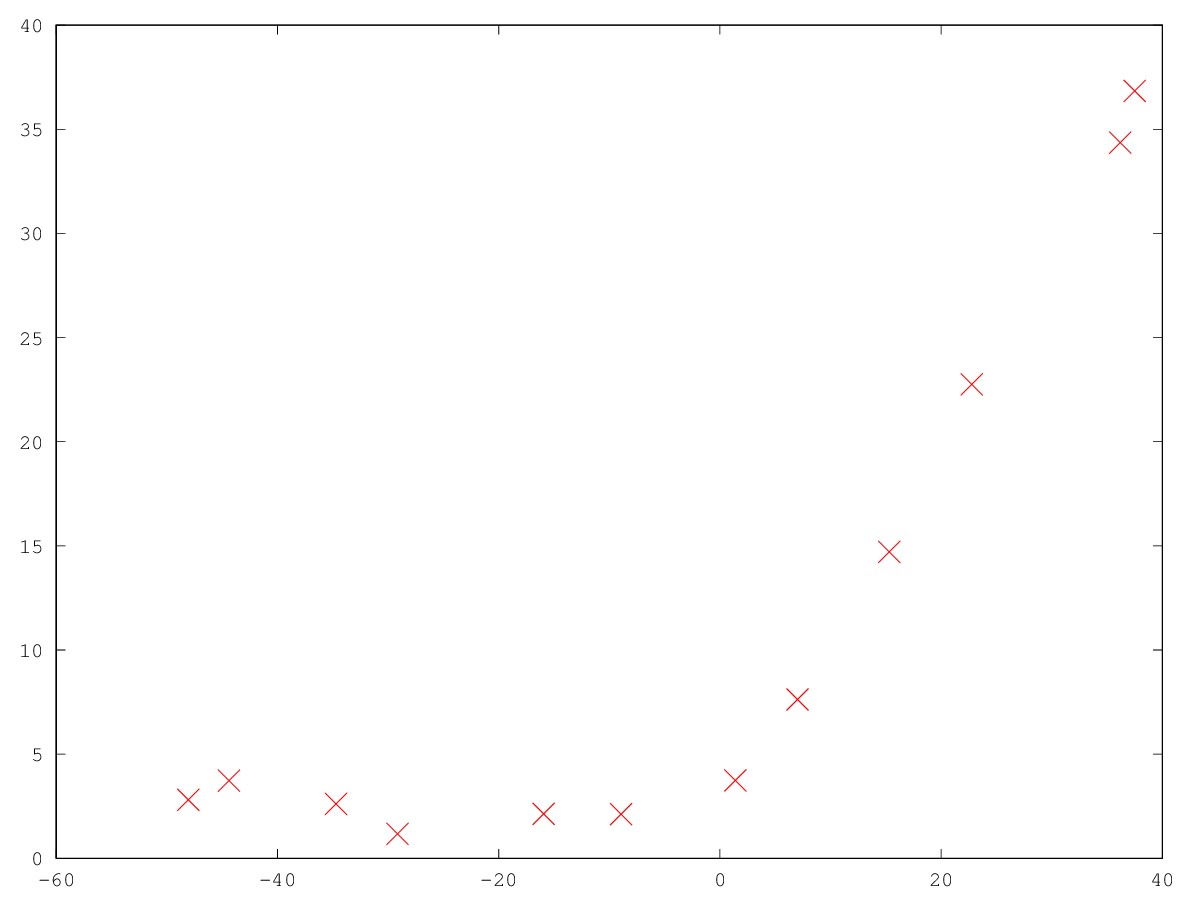

In [93]:
warning('off','all');
load('ex5data1.mat');
m = size(X, 1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);

## Regularized liner regression cost function

$$
J(\theta) = {1 \over 2m}\left(\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2\right) + {\lambda \over 2m}\left(\sum_{j=1}^n\theta_j^2\right)
$$

In [26]:
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    hx = X * theta;
    J = sum((hx - y) .^ 2) / (2 * m);
    J = J + sum([0; theta(2:end)].^ 2) * lambda / (2 * m);
    
    grad = grad(:);
endfunction

J = linearRegCostFunction([ones(m, 1) X], y, [1; 1], 1);
fprintf(['Cost at theta = [1 ; 1]: %f '...
              '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


## Regularized linear regression gradient

$$
\begin{eqnarray}
{\partial \over \partial \theta_0}J(\theta) & = & {1 \over m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\ \ & \text{for $j = 0$}\\
{\partial \over \partial \theta_j}J(\theta) & = & \left({1 \over m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\right) + {\lambda \over m}\theta_j\ \ & \text{for $j \geq 1$}
\end{eqnarray}
$$

In [91]:
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    hx = X * theta;
    J = sum((hx - y) .^ 2) / (2 * m);
    J = J + sum([0; theta(2:end)].^ 2) * lambda / (2 * m);
    
    grad = X' * (hx - y) ./ m + [0 ; theta(2:end)] .* lambda ./ m;
    grad = grad(:);
endfunction

[J, grad] = linearRegCostFunction([ones(m, 1) X], y, [1;1], 1);
fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
              '\n(this value should be about [-15.303016; 598.250744])\n'], ...
              grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## Fitting linear regression

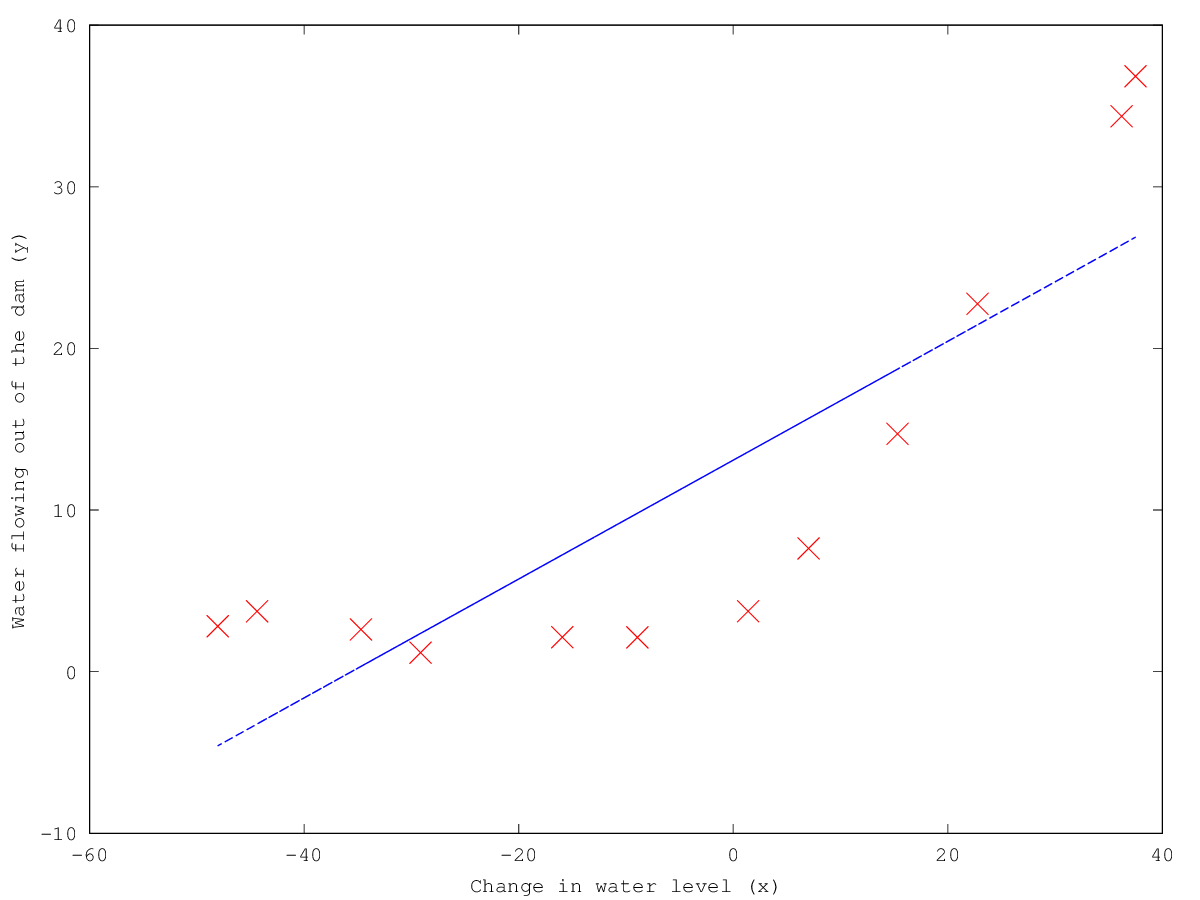

In [46]:
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

# Bias - variance

## Learning curves

$$
J_{\text{train}}(\theta) = {1 \over 2m}\Biggl[
    \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2
\Biggr]
$$

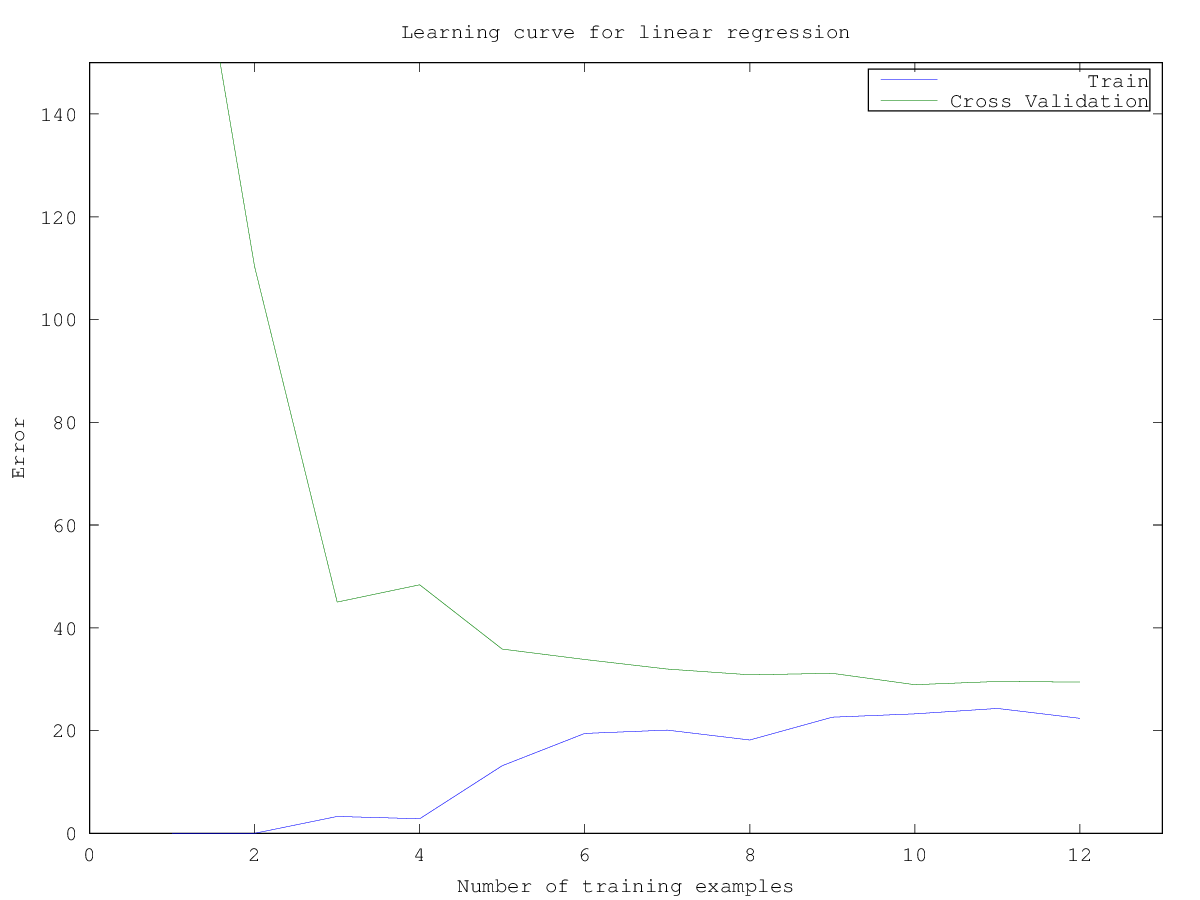

In [135]:
function [error_train, error_val] = learningCurve(...
                        X, y, Xval, yval, lambda)
    m = size(X, 1);
    error_train = zeros(m, 1);
    error_val = zeros(m, 1);
    
    for i = 1:m,
        Xt = X(1:i, :);
        yt = y(1:i);
        [theta] = trainLinearReg(Xt, yt, lambda);
        
        error_train(i) = linearRegCostFunction(...
            Xt, yt, theta, 0);
        error_val(i) = linearRegCostFunction(...
            Xval, yval, theta, 0);
    end;
endfunction

lambda = 0;
[error_train, error_val] = learningCurve(...
    [ones(m, 1) X], y, ...
    [ones(size(Xval, 1), 1) Xval], yval, ...
    lambda);
plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

# Polynomial regression

In [136]:
function [X_poly] = polyFeatures(X, p)
    X_poly = zeros(numel(X), p);
    
    for i = 1:p,
        X_poly(:, i) = X .^ i;
    end;
endfunction

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


## Learning Polynomial Regression

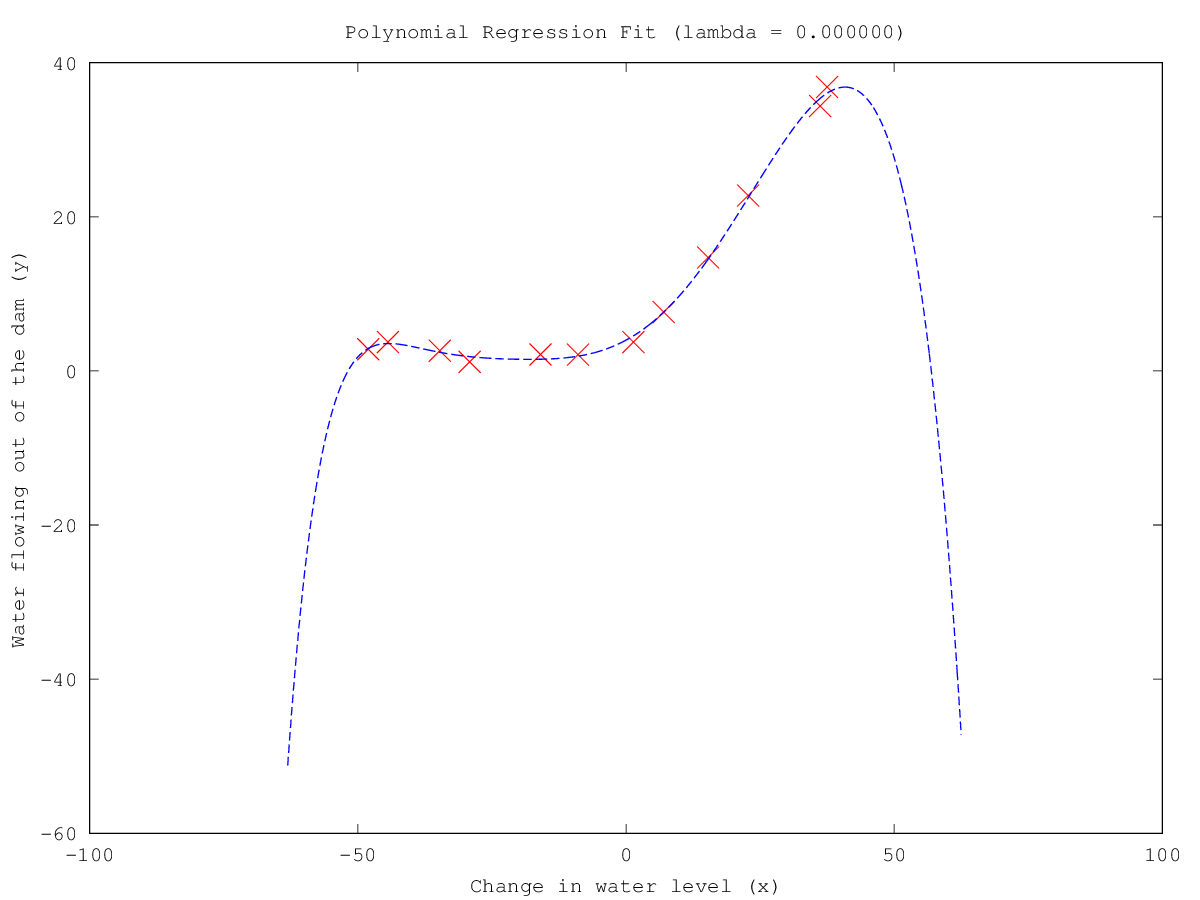

In [83]:
lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.597975
  	6		0.000051	10.476365
  	7		0.026049	10.654568
  	8		0.076369	5.293786
  	9		0.059212	12.809828
  	10		0.124992	7.343872
  	11		0.059034	9.565488
  	12		0.142483	16.299993


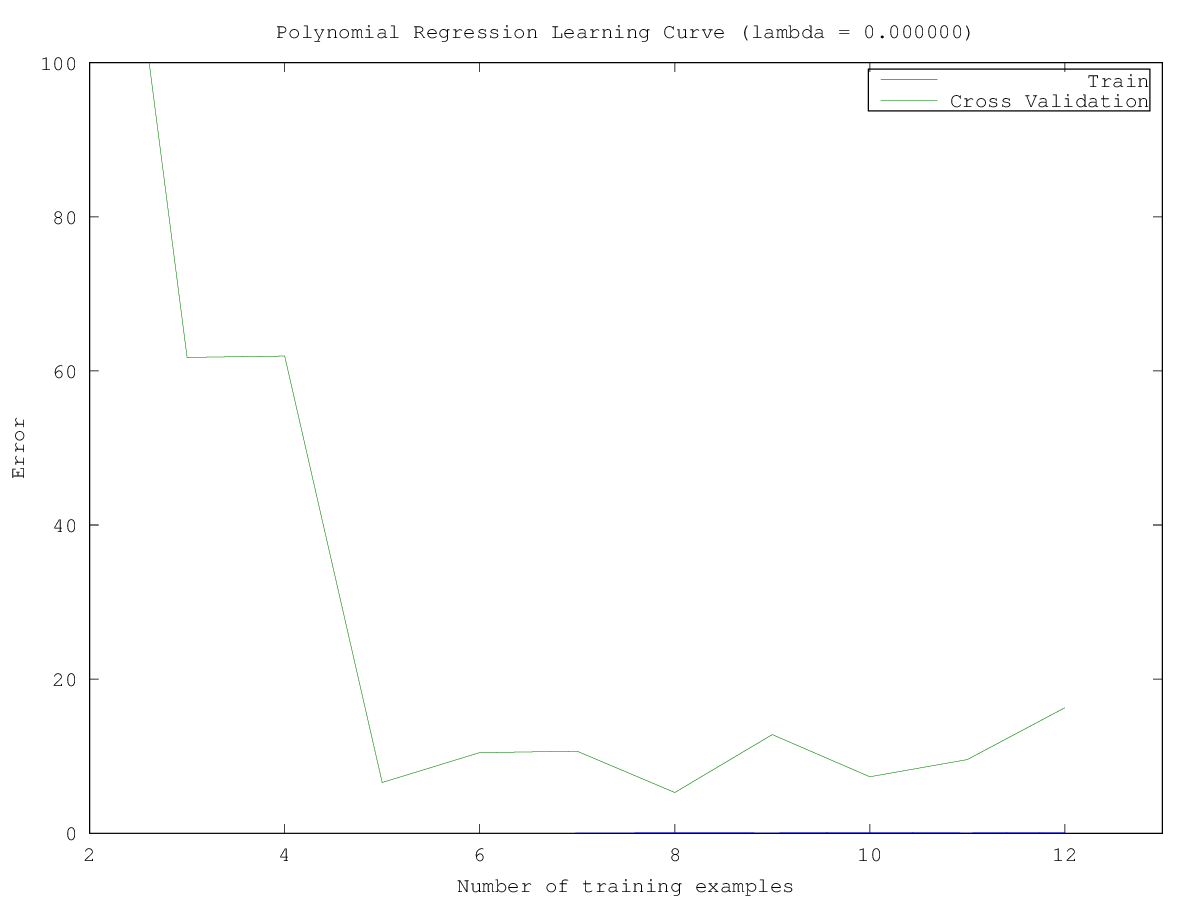

In [137]:
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([2 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

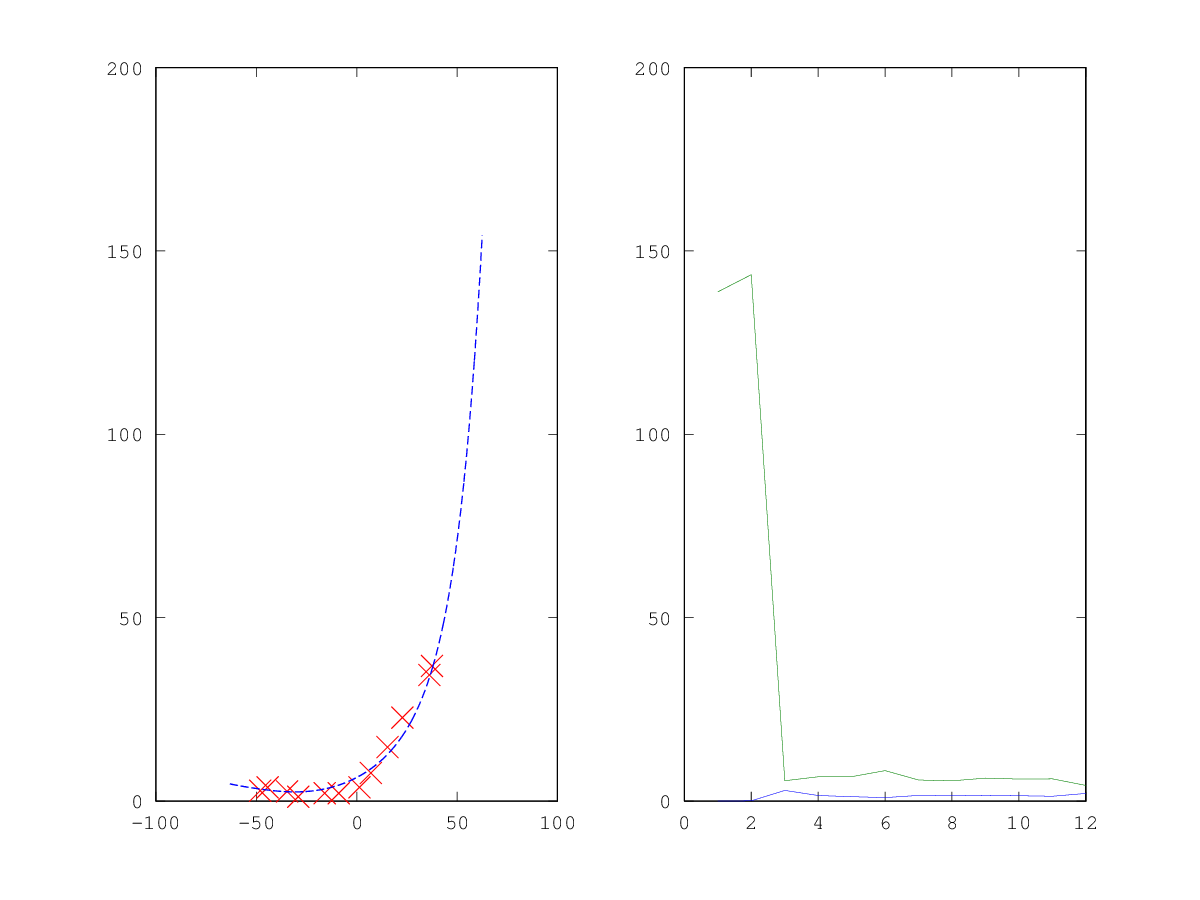

In [138]:
lambda = 1;
[theta] = trainLinearReg(X_poly, y, lambda);

subplot(1, 2,  1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);

subplot(1, 2, 2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

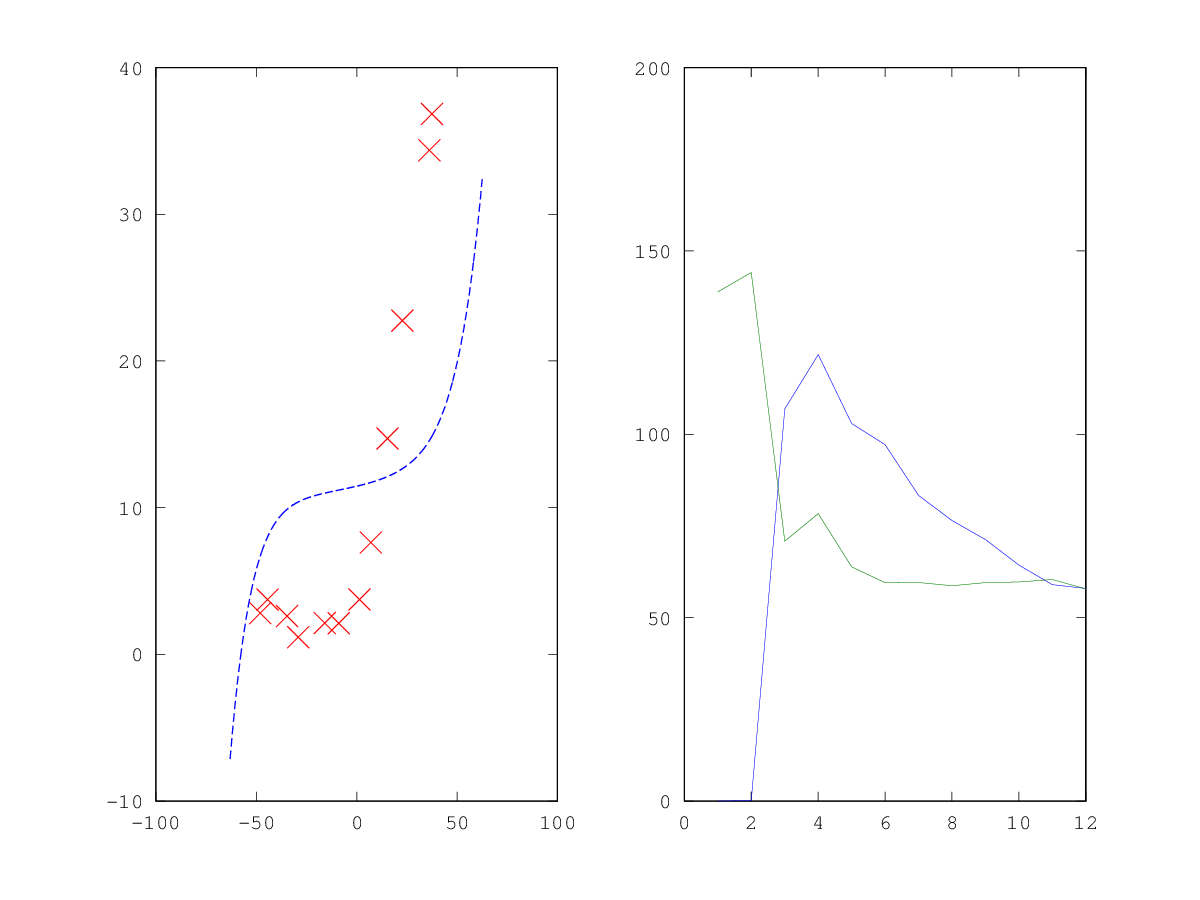

In [139]:
lambda = 100;
[theta] = trainLinearReg(X_poly, y, lambda);

subplot(1, 2,  1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);

subplot(1, 2, 2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

## Selecting $\lambda$  using  a cross validation set

lambda		Train Error	Validation Error
 0.000000	0.142483	16.299993
 0.001000	0.167294	18.883526
 0.003000	0.179378	17.870254
 0.010000	0.223443	17.089132
 0.030000	0.281844	12.828798
 0.100000	0.459318	7.587013
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260625
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


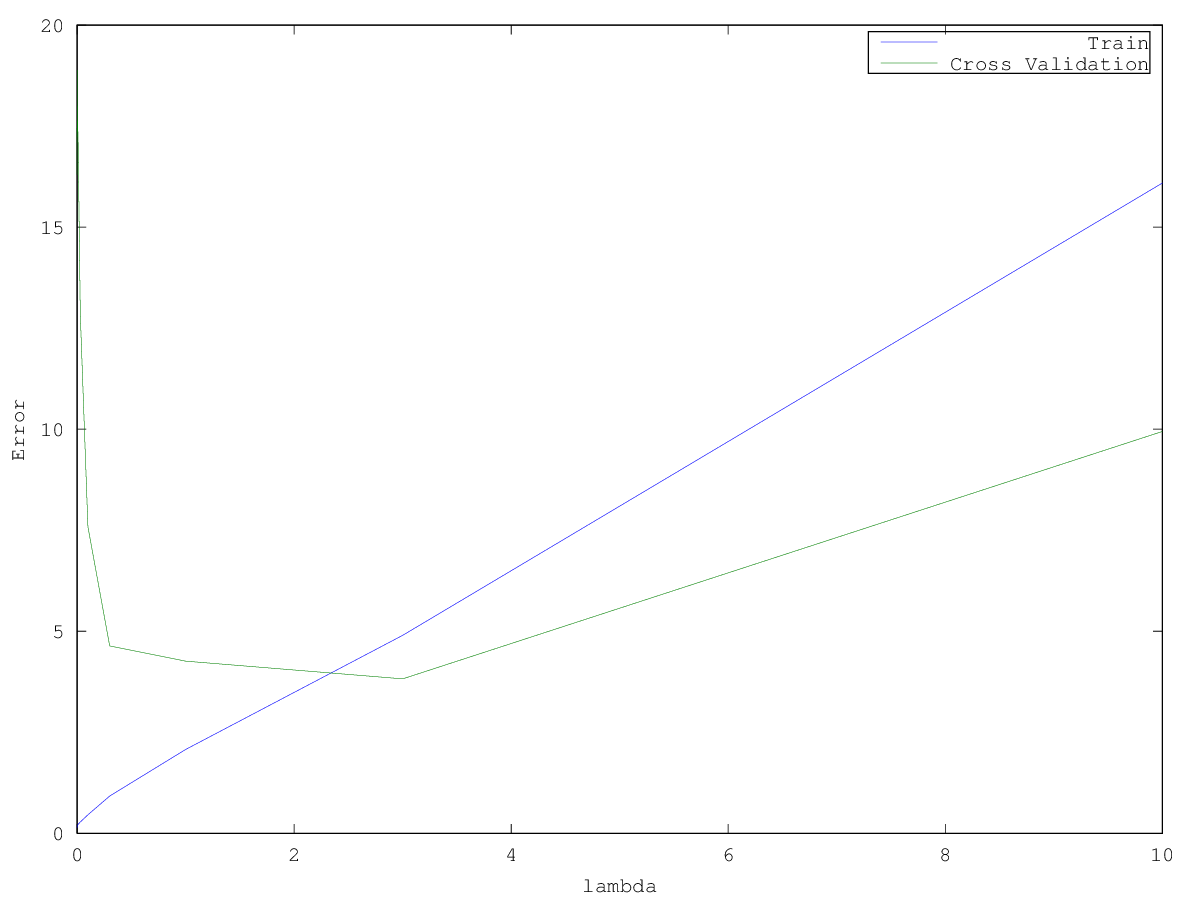

In [140]:
function [lambda_vec, error_train, error_val] = ...
                validationCurve(X, y, Xval, yval)
    lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]';

    % You need to return these variables correctly.
    error_train = zeros(length(lambda_vec), 1);
    error_val = zeros(length(lambda_vec), 1);
    
    for i = 1:length(lambda_vec),
        lambda = lambda_vec(i);
        [theta] = trainLinearReg(X, y, lambda);
                
        error_train(i) = linearRegCostFunction(...
            X, y, theta, 0);
        error_val(i) = linearRegCostFunction(...
            Xval, yval, theta, 0);
    end;
endfunction

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
    fprintf(' %f\t%f\t%f\n', ...
        lambda_vec(i), error_train(i), error_val(i));
end

一番CV誤差の低い正規化パラメータを選択する

In [141]:
[err, i] = min(error_val);
optLambda = lambda_vec(i);
err
optLambda

err =  3.8229
optLambda =  3


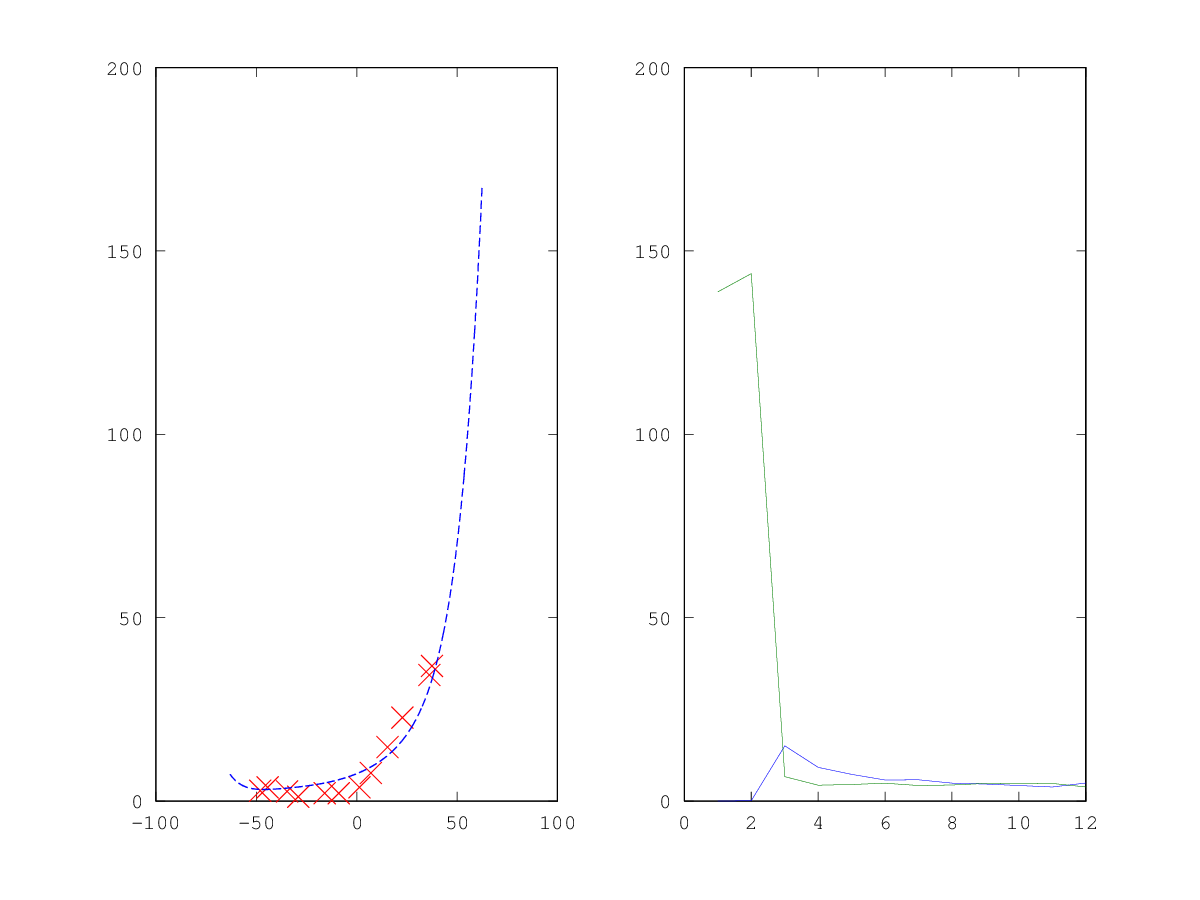

In [142]:
[theta] = trainLinearReg(X_poly, y, optLambda);

subplot(1, 2,  1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);

subplot(1, 2, 2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, optLambda);
plot(1:m, error_train, 1:m, error_val);

最適な正規化パラメータで学習したパラメータ $\theta$ をテストセットで評価する

In [143]:
[theta] = trainLinearReg(X_poly, y, optLambda);
error_test = linearRegCostFunction(...
            X_poly_test, ytest, theta, 0)

error_test =  3.8599


## Plotting learning curves with randomly selected examples

特にトレーニングセットが少ない場合、アルゴリズムのデバッグのため学習曲線をプロットする時にランダムに選択したサンプルを使ってトレーニング誤差とCV誤差を決定するのは有効

* i 個のサンプルをトレーニングセットとCVセットからランダムに選択する
* $\theta$ をランダムに選択したトレーニングセットから学習する
* ランダムに選択したトレーニングセットとCVセットで学習した $\theta$ を評価する
* 上記のステップを何回か(今回は50回) 繰り返して、誤差の平均を i 個のサンプルに対するトレーニング誤差、CV誤差として決定する

i = 01	errTrain = 0.000000	errVal = 139.097888
i = 02	errTrain = 0.005004	errVal = 72.515655
i = 03	errTrain = 0.018558	errVal = 34.508674
i = 04	errTrain = 0.028525	errVal = 24.827548
i = 05	errTrain = 0.044207	errVal = 16.646614
i = 06	errTrain = 0.065043	errVal = 13.417862
i = 07	errTrain = 0.089762	errVal = 12.718756
i = 08	errTrain = 0.120762	errVal = 10.094352
i = 09	errTrain = 0.154702	errVal = 9.426913
i = 10	errTrain = 0.184648	errVal = 9.096064
i = 11	errTrain = 0.202383	errVal = 8.529355
i = 12	errTrain = 0.222097	errVal = 8.617000


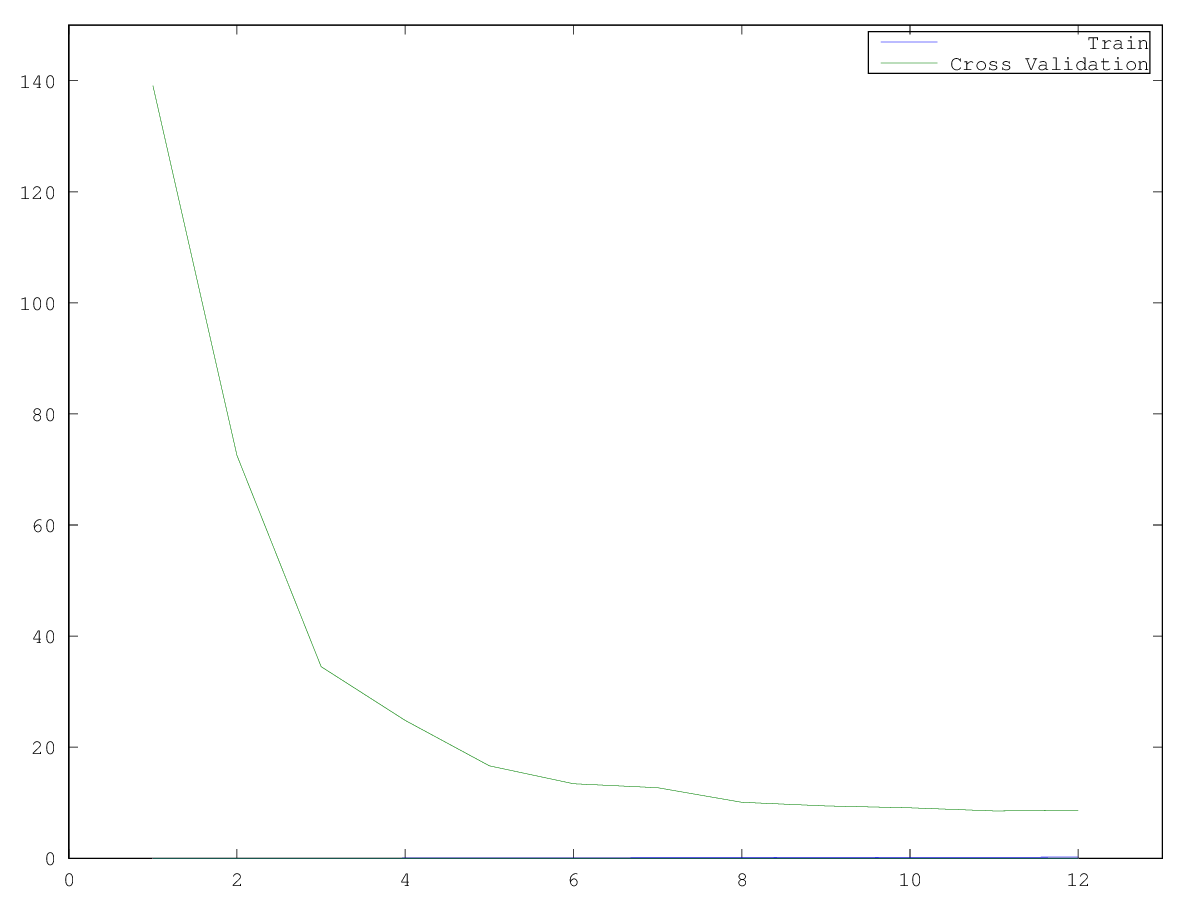

In [151]:
function [error_train, error_val] = ...
                        learningCurveWithRandomlySelectedExamples(...
                        X, y, Xval, yval, lambda)
    m = size(X, 1);
    n = 50;
    error_train = zeros(m, n);
    error_val = zeros(m, n);
    
    for i = 1:m,
        error_train_i = zeros(n, 1);
        error_val_i = zeros(n, 1);
    
        for j = 1:n,    
            ri = randperm(m);
            Xt = X(ri(1:i), :);
            yt = y(ri(1:i));
            ri = randperm(m);
            Xvalt = Xval(ri(1:i), :);
            yvalt = yval(ri(1:i));
    
            [theta] = trainLinearReg(Xt, yt, lambda);
        
            error_train_i(j) = linearRegCostFunction(...
                Xt, yt, theta, 0);
            error_val_i(j) = linearRegCostFunction(...
                Xvalt, yvalt, theta, 0);
        end;
        
        error_train(i) = sum(error_train_i) / n;
        error_val(i) = sum(error_val_i) / n;
        fprintf('i = %02d\terrTrain = %f\terrVal = %f\n', i, error_train(i), error_val(i));
    end;
endfunction

lambda = 0.01;
[error_train, error_val] = learningCurveWithRandomlySelectedExamples(...
    X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);
legend('Train', 'Cross Validation')
axis([0 13 0 150])